# pyMMF: Benchmark test for straights step index fibers

In [8]:
import pyMMF
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('figure', figsize=(18,9))
rc('text', usetex=True)
from IPython.display import display, Math

## Fiber parameters

In [75]:
## Parameters
NA = 0.15
radius = 10. # in microns
areaSize = 3.5*radius # calculate the field on an area larger than the diameter of the fiber
npoints = 2**8 # resolution of the window
n1 = 1.45
wl = 0.6328 # wavelength in microns

## Instantiate the solver

In [76]:
# Create the fiber object
profile = pyMMF.IndexProfile(npoints = npoints, areaSize = areaSize)

# Initialize the index profile
profile.initStepIndex(n1=n1,a=radius,NA=NA)

# Instantiate the solver
solver = pyMMF.propagationModeSolver()

# Set the profile to the solver
solver.setIndexProfile(profile)

# Set the wavelength
solver.setWL(wl)

# Estimate the number of modes for a graded index fiber
Nmodes_estim = pyMMF.estimateNumModesSI(wl,radius,NA,pola=1)

print(f"Estimated number of modes using the V number = {Nmodes_estim}")

2019-02-21 17:12:42,988 - pyMMF.core [DEBUG  ]  Debug mode ON.


Estimated number of modes using the V number = 56


## Semi-analytical solution

In [77]:
modes_semianalytical = solver.solve(mode = 'SI', curvature = None)

2019-02-21 17:12:43,597 - pyMMF.SI   [INFO   ]  Finding the propagation constant of step index fiber by numerically solving the dispersion relation.
2019-02-21 17:12:45,306 - pyMMF.SI   [INFO   ]  Found 59 modes is 1.71 seconds.
2019-02-21 17:12:52,365 - pyMMF.core [DEBUG  ]  Mode data stored in memory.


## Numerical calculations

In [78]:
modes_eig = solver.solve(nmodesMax=Nmodes_estim+10,boundary = 'close', mode = 'eig', curvature = None, propag_only=True)

2019-02-21 17:12:52,370 - pyMMF.core [INFO   ]  Solving the spatial eigenvalue problem for mode finding.
2019-02-21 17:12:52,371 - pyMMF.core [INFO   ]  Use close boundary condition.
2019-02-21 17:14:48,741 - pyMMF.core [INFO   ]  Solver found 59 modes is 116.37 seconds.
2019-02-21 17:14:48,745 - pyMMF.core [DEBUG  ]  Mode data stored in memory.


## Comparing results

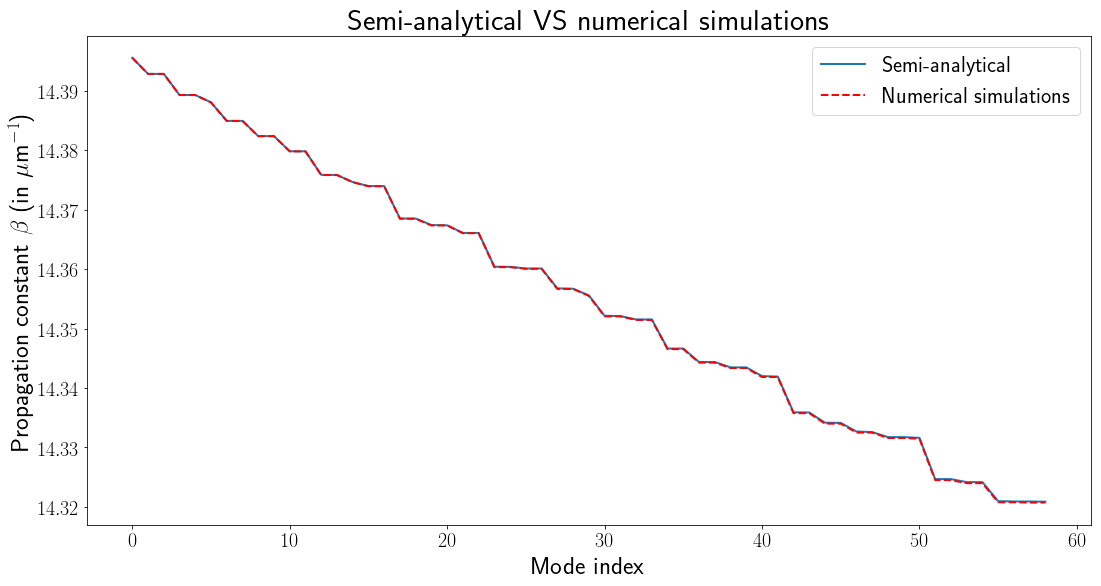

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [80]:
# Sort the modes
modes = {}
idx = np.flip(np.argsort(modes_semianalytical.betas), axis=0)
modes['SA'] = {'betas':np.array(modes_semianalytical.betas)[idx],'profiles':[modes_semianalytical.profiles[i] for i in idx]}
idx = np.flip(np.argsort(modes_eig.betas), axis=0)
modes['num'] = {'betas':np.array(modes_eig.betas)[idx],'profiles':[modes_eig.profiles[i] for i in idx]}


def sort(a):
    return np.flip(np.sort(a),axis=0)

# Estimating error
delta_beta = np.max(modes_semianalytical.betas)-np.min(modes_semianalytical.betas)
me = np.mean(np.abs(modes['num']['betas']-modes['SA']['betas']))/delta_beta
maxe = np.max(np.abs(modes['num']['betas']-modes['SA']['betas']))/delta_beta


plt.figure(); 
plt.plot(sort(np.real(modes_eig.betas)),label='Semi-analytical',linewidth=2.)
plt.plot(sort(np.real(modes_semianalytical.betas)),'r--',label='Numerical simulations',linewidth=2.)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title(r'Semi-analytical VS numerical simulations' ,fontsize = 30)
plt.ylabel(r'Propagation constant $\beta$ (in $\mu$m$^{-1}$)', fontsize = 25)
plt.xlabel(r'Mode index', fontsize = 25)
plt.legend(fontsize = 22,loc='upper right')
plt.show()


display(Math(r'\frac{\left\langle\left|\beta_{num}-\beta_{SA}\right|\right\rangle}{\beta_{max}-\beta_{min}}= %.2e' % me))
display(Math(r'\frac{\max{}\left|\beta_{num}-\beta_{SA}\right|}{\beta_{max}-\beta_{min}}= %.2e' % maxe))



## Comparing numerical solutions to LP modes

(-0.5, 255.5, 255.5, -0.5)

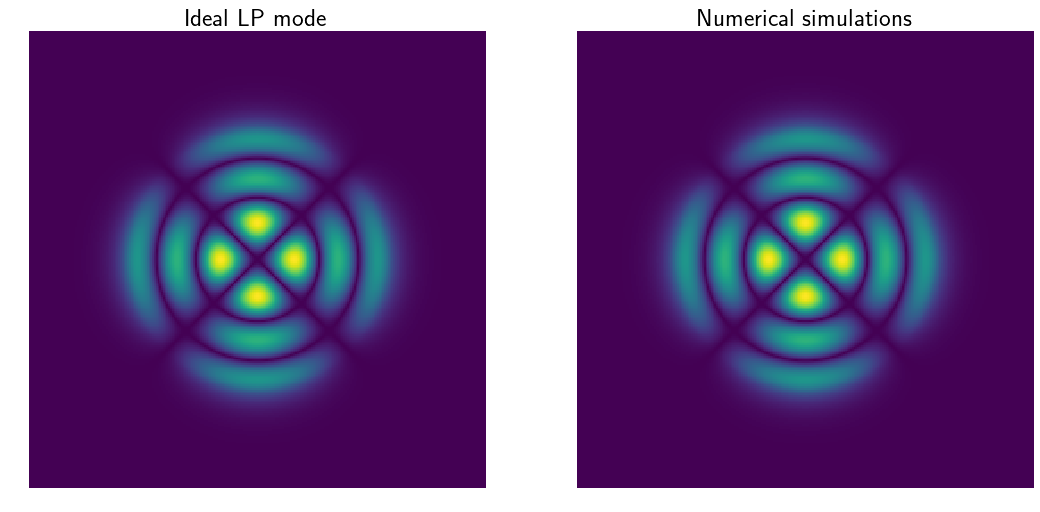

In [84]:
imode = 27
plt.figure()
plt.subplot(121)
plt.imshow(np.abs(modes['SA']['profiles'][imode].reshape([npoints]*2)))
plt.gca().set_title("Ideal LP mode",fontsize=25)
plt.axis('off')
plt.subplot(122)
plt.imshow(np.abs(modes['num']['profiles'][imode].reshape([npoints]*2)))
plt.gca().set_title("Numerical simulations",fontsize=25)
plt.axis('off')